Librerias

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
# Deep learning
import tensorflow.keras as keras
#from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


#### History plot funcion

In [8]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

#### Carga de datos

In [5]:
DATASETH_PATH ="data.json"

In [3]:
#Función para leer los archivos
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data=json.load(fp)

    #Convertir lista en un arreglo numpy
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    print("Datos cargados exitosamente")
    
    return inputs,targets

## Modelo deep learning redes neuronales

##### 1er modelo dense layers

Datos cargados exitosamente
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_78 (Flatten)        (None, 156)               0         
                                                                 
 dense_229 (Dense)           (None, 512)               80384     
                                                                 
 dense_230 (Dense)           (None, 256)               131328    
                                                                 
 dense_231 (Dense)           (None, 64)                16448     
                                                                 
 dense_232 (Dense)           (None, 10)                650       
                                                                 
Total params: 228,810
Trainable params: 228,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==

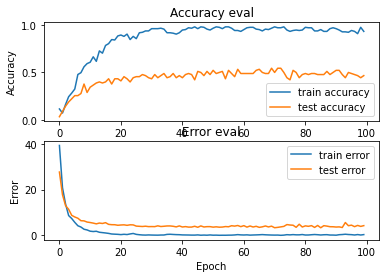

In [154]:
# Carga de datos
if __name__ == "__main__":
    #Cargando los datos
    inputs,targets = load_data(DATASETH_PATH)

    # Division entrenamiento-prueba
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

    # construccion del modelo arqutiectura
    model = keras.Sequential([
        
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden dense layer
        keras.layers.Dense(512, activation='relu'),

        # 2nd hidden dense layer
        keras.layers.Dense(256, activation='relu'),

        # 3rd hidden dense layer
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), batch_size=32, epochs=100)
    # 1era evaluación
    plot_history(history)

* Se puede observar que presenta una precisión del 93.81% con el conjunto de entrenamiento, sin embargo, con el conjunto de validación presenta una presición del 53%. Por lo tanto, nuestro modelo no ha sido capaz de generalizar bien la información
* Ver sección "Evaluación del modelo (1era evaluación)"

##### 1er modelo.- TRATAMIENTO DE OVERFITTING

Datos cargados exitosamente
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_80 (Flatten)        (None, 156)               0         
                                                                 
 dense_237 (Dense)           (None, 512)               80384     
                                                                 
 dense_238 (Dense)           (None, 256)               131328    
                                                                 
 dense_239 (Dense)           (None, 64)                16448     
                                                                 
 dense_240 (Dense)           (None, 10)                650       
                                                                 
Total params: 228,810
Trainable params: 228,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==

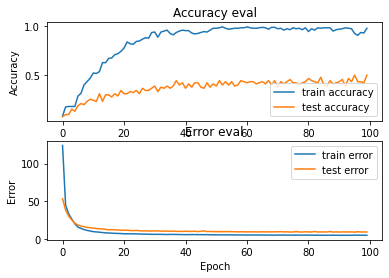

In [157]:
# Carga de datos
if __name__ == "__main__":
    #Cargando los datos
    inputs,targets = load_data(DATASETH_PATH)

    # Division entrenamiento-prueba
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

    # construccion del modelo arqutiectura
    model = keras.Sequential([
        
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st hidden dense layer
        keras.layers.Dense(512, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.01)),
        #keras.layers.Dropout(0.4),

        # 2nd hidden dense layer
        keras.layers.Dense(256, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.01)),
        #keras.layers.Dropout(0.4),

        # 3rd hidden dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        #keras.layers.Dropout(0.4),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

    model.summary()

    # train model
    history2 = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), batch_size=32, epochs=100)
    # 2da Evaluación, drop out =  epocas = , Regularization = L2 
    plot_history(history2)

#### 2do modelo CNN

##### Funciones

In [69]:
def prepare_datasets(test_size, validation_size):
    # load data
    X, y = load_data(DATASETH_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [146]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    #model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    #model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    #model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    #model.add(keras.layers.Conv2D(32, (2, 2), activation='relu')) ##################################################
    #model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    #model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) 

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [64]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

##### Main code

Datos cargados exitosamente
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 10, 11, 32)        320       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 5, 6, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_63 (Bat  (None, 5, 6, 32)         128       
 chNormalization)                                                
                                                                 
 flatten_81 (Flatten)        (None, 960)               0         
                                                                 
 dense_241 (Dense)           (None, 64)                61504     
                                                                 
 dropout_93 (Dropout)    

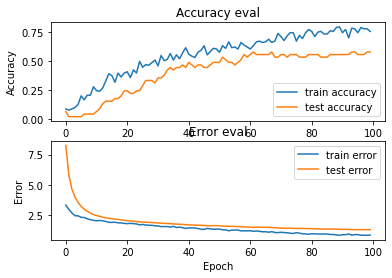

3/3 - 0s - loss: 1.1555 - accuracy: 0.6400 - 27ms/epoch - 9ms/step

Test accuracy: 0.6399999856948853


In [158]:
if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)